In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("train.csv")

In [9]:
data.shape

(1458644, 11)

In [10]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [11]:
data[["pickup_datetime", "dropoff_datetime"]] = \
    pd.to_datetime(data[["pickup_datetime", "dropoff_datetime"]].stack()).unstack()


In [12]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

## Columns description

`Data fields`

* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* trip_duration - duration of the trip in seconds

In [26]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [27]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [66]:
data.nunique()

id                    1458584
vendor_id                   2
pickup_datetime       1380164
dropoff_datetime      1380320
passenger_count             9
pickup_longitude        23043
pickup_latitude         45240
dropoff_longitude       33817
dropoff_latitude        62518
store_and_fwd_flag          2
trip_duration            7416
dtype: int64

## 0 Passegner

Some trips has no passenger that's weird, let's examine that

In [41]:
zero_passenger = data[data.passenger_count==0]

In [42]:
zero_passenger.shape

(60, 11)

In [43]:
zero_passenger

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
62744,id3917283,2,2016-06-06 16:39:09,2016-06-07 16:30:50,0,-73.776367,40.645248,-73.776360,40.645260,N,85901
136519,id3645383,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,-73.993134,40.757473,-73.993294,40.757538,N,4
194288,id2840829,2,2016-02-21 01:33:52,2016-02-21 01:36:27,0,-73.946243,40.772903,-73.946770,40.774841,N,155
217765,id3762593,1,2016-01-04 12:24:17,2016-01-04 13:01:48,0,-73.815224,40.700081,-73.950699,40.755222,N,2251
263809,id2154895,1,2016-05-23 23:37:37,2016-05-23 23:37:45,0,-73.861633,40.705029,-73.861633,40.705029,N,8
278290,id0796773,1,2016-02-07 17:23:48,2016-02-07 17:23:57,0,-73.954941,40.687866,-73.954742,40.687862,N,9
301600,id2091096,2,2016-01-01 23:52:46,2016-01-02 00:27:18,0,-73.993652,40.757046,-73.918869,40.757793,N,2072
303133,id0414625,2,2016-01-05 18:52:20,2016-01-05 18:52:35,0,-73.985291,40.738335,-73.985352,40.738361,N,15
337809,id0271506,2,2016-05-22 00:23:15,2016-05-22 00:23:56,0,-73.956718,40.777142,-73.956764,40.776958,N,41
375972,id3176865,2,2016-05-31 05:10:23,2016-05-31 05:10:38,0,-73.982468,40.727974,-73.982468,40.728001,N,15


In [39]:
data[(data.passenger_count==0) & (data.trip_duration <60)].shape

(42, 11)

In [58]:
print("Median change in longitute is :",
      (zero_passenger["pickup_longitude"] - zero_passenger["dropoff_longitude"]).median() * 87.36*1000, "meters")

Median change in longitute is : 0.0 meters


In [59]:
print("Median change in latitute is ", 
      (zero_passenger["pickup_latitude"] - zero_passenger["dropoff_latitude"]).median()*110.4*1000, "meters")

Median change in latitute is  0.0 meters


We use median to exclude outlier 0 passengers trips

We may conclude from results that in these trips duration is relatively small - smaller than 1 minute and
location of the car does not changed much, hence those can be canceled trips, or similar issues. 

**We should exclude those trips**

In [60]:
data = data[data.passenger_count>0]

### Let's study datetimes

In [61]:
overall_data_duration_length = pd.Timestamp(data.dropoff_datetime.max()) - pd.Timestamp(data.pickup_datetime.min())

In [62]:
print(overall_data_duration_length)

182 days 23:01:46


We have trip data information for 182 days

In [63]:
def pickup_counts_by_date(date="month"):
    if date=='month':
        pickup_date = data.pickup_datetime.dt.month
    elif date=="year":
        pickup_date = data.pickup_datetime.dt.year
    elif date=="day":
        pickup_date = data.pickup_datetime.dt.day

    fig = plt.figure(figsize=(9, 6))
    pickup_date.value_counts()
    pickup_date.value_counts().sort_index().plot(kind="bar")
    plt.xlabel(f"{date}")
    plt.ylabel("Count")
    plt.title(f"Pickup count by {date}")

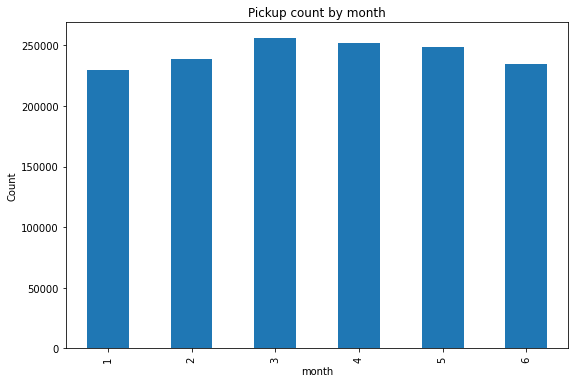

In [64]:
pickup_counts_by_date(date="month")

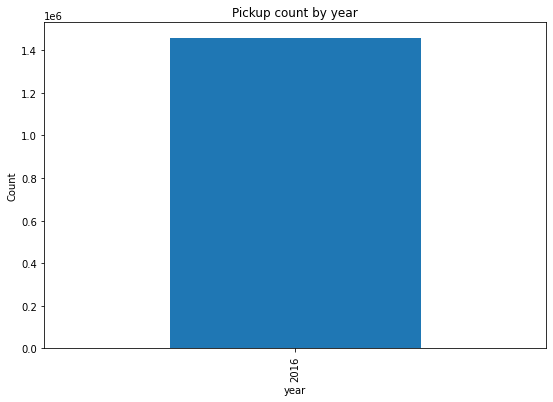

In [17]:
pickup_counts_by_date(date="year")

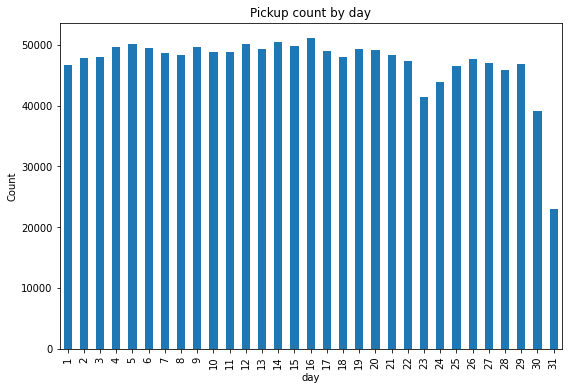

In [18]:
pickup_counts_by_date(date="day")

In [23]:
data.iloc[::10, :].shape

(145865, 11)

<AxesSubplot:xlabel='pickup_datetime', ylabel='trip_duration'>

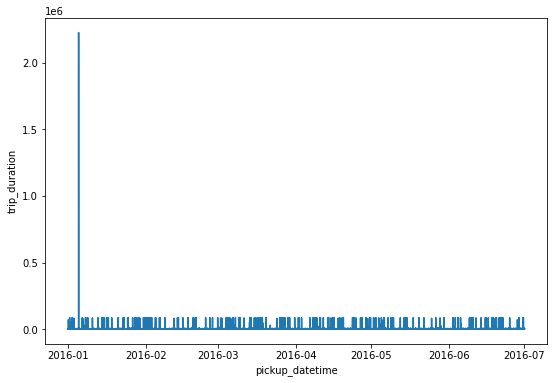

In [24]:
plt.figure(figsize=(9, 6))
sns.lineplot(x="pickup_datetime", y="trip_duration", data=data.iloc[::10, :])

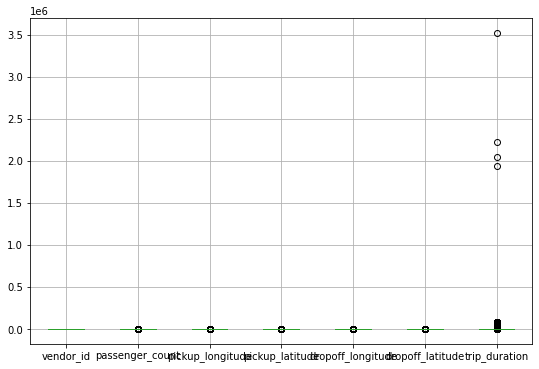

In [68]:
plt.figure(figsize=(9, 6))
data.boxplot();